# Downloading and Inspecting the Data

In [ ]:
!kaggle datasets download taweilo/loan-approval-classification-data

Dataset URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data
License(s): apache-2.0
  0% 0.00/751k [00:00<?, ?B/s]
100% 751k/751k [00:00<00:00, 105MB/s]


In [ ]:
import zipfile
zfile = zipfile.ZipFile('loan-approval-classification-data.zip')
zfile.extractall()
zfile.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


<BarContainer object of 2 artists>

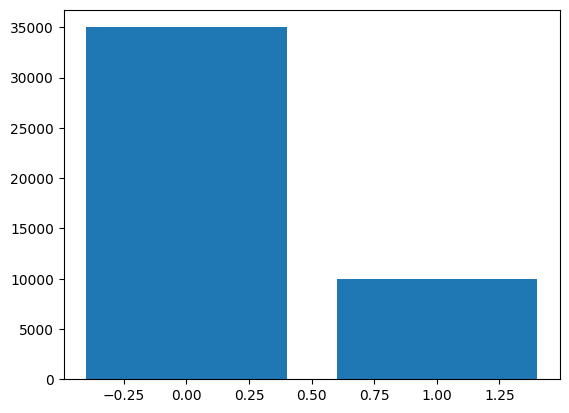

In [ ]:
plt.bar(data['loan_status'].value_counts().index, data['loan_status'].value_counts().values)

In [ ]:
data.loan_status.value_counts()

,count
loan_status,
0,35000
1,10000


In [ ]:
data.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


# Data Preprocessing

In [ ]:
cat_columns = data.select_dtypes(include='object').columns
cat_columns

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
num_columns = data.select_dtypes(exclude='object').columns
num_columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')

In [ ]:
for col in cat_columns:
    print(col)
    print(data[col].value_counts())
    print()

person_gender
person_gender
male      24841
female    20159
Name: count, dtype: int64

person_education
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

person_home_ownership
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

loan_intent
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64



In [ ]:
data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()

In [ ]:
df = data.copy()

In [ ]:
df[cat_columns] = le.fit_transform(df[cat_columns])
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0.0,4.0,71948.0,0,3.0,35000.0,4.0,16.02,0.49,3.0,561,0.0,1
1,21.0,0.0,3.0,12282.0,0,2.0,1000.0,1.0,11.14,0.08,2.0,504,1.0,0
2,25.0,0.0,3.0,12438.0,3,0.0,5500.0,3.0,12.87,0.44,3.0,635,0.0,1
3,23.0,0.0,1.0,79753.0,0,3.0,35000.0,3.0,15.23,0.44,2.0,675,0.0,1
4,24.0,1.0,4.0,66135.0,1,3.0,35000.0,3.0,14.27,0.53,4.0,586,0.0,1


In [ ]:
df.dtypes

,0
person_age,float64
person_gender,float64
person_education,float64
person_income,float64
person_emp_exp,int64
person_home_ownership,float64
loan_amnt,float64
loan_intent,float64
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


## Balancing Imbalanced data

In [ ]:
## Using oversampling
df_majority = df[df['loan_status'] == 0]
df_minority = df[df['loan_status'] == 1]

from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
upsampled = pd.concat([df_majority, df_minority_upsampled])
upsampled['loan_status'].value_counts()

,count
loan_status,
0,35000
1,35000


In [ ]:
x = upsampled.drop('loan_status', axis=1)
y = upsampled['loan_status']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,-1.104773,-1.109667,0.851055,-0.863991,-0.879057,0.057269,-1.358520,-0.839675,-0.165857,-0.824821,-0.977671,-2.546536,1.436101
1,-0.773338,-1.109667,-1.179642,0.943000,-0.879057,0.769954,3.762693,-0.839675,-1.199897,0.887916,-0.467294,-0.978981,-0.696330
2,-0.773338,-1.109667,1.527955,7.529673,-0.051631,-1.368101,3.009574,-1.422487,-0.322240,-1.127069,-0.722483,0.747314,1.436101
3,-0.773338,0.901172,-0.502743,1.027777,-0.879057,0.769954,3.762693,-0.839675,-1.199897,0.787167,-0.467294,0.608417,-0.696330
4,-0.441903,0.901172,-0.502743,1.751837,-0.879057,0.769954,3.762693,1.491576,-1.330748,0.182671,-0.467294,1.025109,1.436101


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, stratify = y, random_state = 10)
ytrain.value_counts(), ytest.value_counts()

(loan_status
 0    28000
 1    28000
 Name: count, dtype: int64,
 loan_status
 0    7000
 1    7000
 Name: count, dtype: int64)

# Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, metrics

In [ ]:
xtrain.shape

(56000, 13)

In [ ]:
model1 = models.Sequential([
    layers.Input(shape=(xtrain.shape[1],)),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer = optimizers.Adam(),
              loss = losses.BinaryCrossentropy(),
              metrics = [metrics.BinaryAccuracy()])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,251 (114.26 KB)

 Trainable params: 29,251 (114.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1 = model1.fit(xtrain, ytrain, epochs=20, validation_data=(xtest, ytest))

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.8688 - loss: 0.2838 - val_binary_accuracy: 0.8797 - val_loss: 0.2501
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.8875 - loss: 0.2380 - val_binary_accuracy: 0.8858 - val_loss: 0.2380
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.8932 - loss: 0.2287 - val_binary_accuracy: 0.8857 - val_loss: 0.2373
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.8947 - loss: 0.2233 - val_binary_accuracy: 0.8896 - val_loss: 0.2343
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.8981 - loss: 0.2168 - val_binary_accuracy: 0.8901 - val_loss: 0.2280
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - binary_accuracy: 0.9015 - loss: 0.2127 - val_binary_accuracy: 0.8960 - val_loss: 0.2204
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9032 - loss: 0.2047 - val_binary_accuracy: 0.8938 - val_loss:

<Axes: >

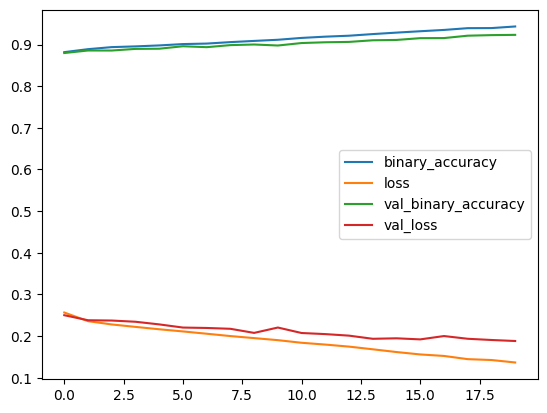

In [ ]:
pd.DataFrame(history1.history).plot()

In [ ]:
model2 = models.Sequential([
    layers.Input(shape=(xtrain.shape[1],)),
    layers.Dense(200, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer = optimizers.Adam(),
              loss = losses.BinaryCrossentropy(),
              metrics = [metrics.BinaryAccuracy()])

model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 200)                 │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,551 (310.75 KB)

 Trainable params: 79,551 (310.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model_2.keras', save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor=0.5, patience=5, min_lr = 1e-6)

history2 = model2.fit(xtrain, ytrain,
                      epochs=50, validation_data=(xtest, ytest),
                      callbacks = [early_stopping, model_checkpoint,reduce_lr])

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9685 - loss: 0.0859 - val_binary_accuracy: 0.9424 - val_loss: 0.1917 - learning_rate: 2.5000e-04
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.9768 - loss: 0.0654 - val_binary_accuracy: 0.9445 - val_loss: 0.2015 - learning_rate: 2.5000e-04
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.9801 - loss: 0.0587 - val_binary_accuracy: 0.9469 - val_loss: 0.2216 - learning_rate: 2.5000e-04
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - binary_accuracy: 0.9831 - loss: 0.0517 - val_binary_accuracy: 0.9479 - val_loss: 0.2228 - learning_rate: 2.5000e-04
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - binary_accuracy: 0.9844 - loss: 0.0465 - val_binary_accuracy: 0.9496 - val_loss: 0.2261 - learning_rate: 2.5000e-04
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.9880 - loss: 0.0401 - val_binary_accuracy: 0.9503 - val_loss: 0.2

In [ ]:
model2.evaluate(xtest, ytest)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9446 - loss: 0.1872


[0.19165734946727753, 0.9423571228981018]

In [ ]:
model2 = tf.keras.models.load_model('model_2.keras')
model2.evaluate(xtest, ytest)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9446 - loss: 0.1872


[0.19165734946727753, 0.9423571228981018]

# Evaluating the Model using Evaluation Metrics

In [ ]:
model2 = tf.keras.models.load_model('model_2.keras')
model2.evaluate(xtest, ytest)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9446 - loss: 0.1872


[0.19165734946727753, 0.9423571228981018]

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ypreds = np.array([np.round(i) for i in model2.predict(xtest)])
print(classification_report(ytest, ypreds))

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7000
           1       0.93      0.96      0.94      7000

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



<ipython-input-30-cbb3cf551876>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ConfusionMatrixDisplay.from_predictions(ytest.ravel(), ypreds)


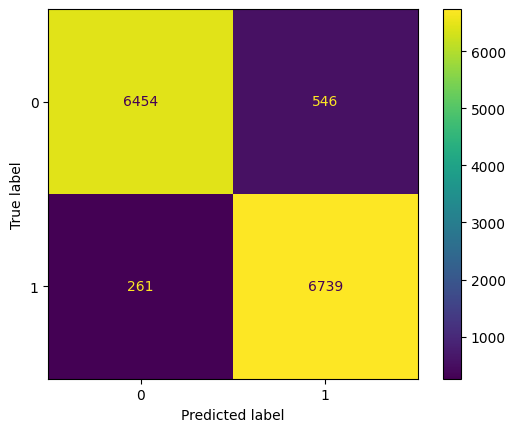

In [ ]:
ConfusionMatrixDisplay.from_predictions(ytest.ravel(), ypreds)

# Training using SKLearn Machine Learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]
scores = []
for model in models:
    model.fit(xtrain, ytrain)
    scores.append(model.score(xtest, ytest))

<BarContainer object of 4 artists>

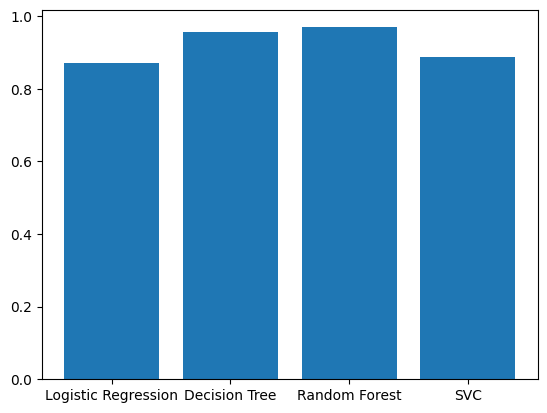

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']
pd.DataFrame(scores, index=model_names, columns=['Accuracy'])
plt.bar(model_names, scores)

## Tuning the RandomForestClassifier Model

In [ ]:
scores = {}
for i in range(10, 200, 10):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(xtrain, ytrain)
    scores[i] = model.score(xtest, ytest)
rf_scores = pd.DataFrame(scores, index=['Accuracy'])

<Axes: >

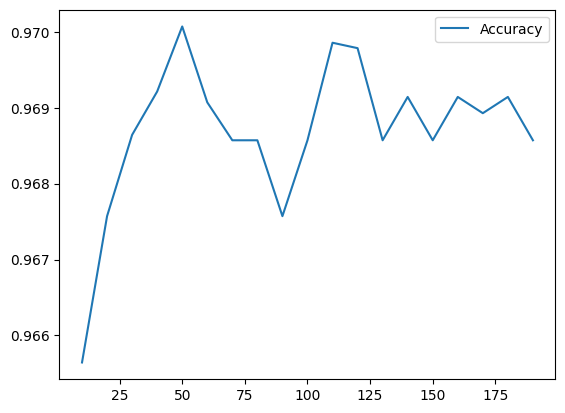

In [ ]:
rf_scores.T.plot()

In [ ]:
rf_scores

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190
Accuracy,0.965643,0.967571,0.968643,0.969214,0.970071,0.969071,0.968571,0.968571,0.967571,0.968571,0.969857,0.969786,0.968571,0.969143,0.968571,0.969143,0.968929,0.969143,0.968571


In [ ]:
model = RandomForestClassifier(n_estimators=50)
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.969

## Evaluating the RandomForestClassifier Model

In [ ]:
ypreds = np.array(model.predict(xtest))
print(classification_report(ytest, ypreds))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7000
           1       0.95      0.99      0.97      7000

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



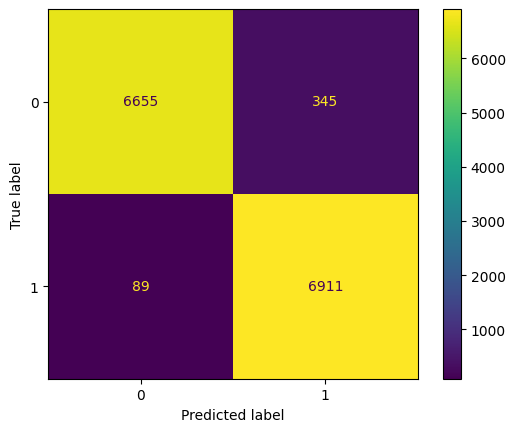

In [ ]:
ConfusionMatrixDisplay.from_predictions(ytest, ypreds)

**This Model performs the best comparing to the Deep Learning Model**

## Saving the RandomForestClassifier model

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'rf_model_97.joblib')

['rf_model_97.joblib']

## Loading and Making Predictions

In [ ]:
x.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

In [ ]:
num_columns, cat_columns

(Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
        'credit_score', 'loan_status'],
       dtype='object'),
 Index(['person_gender', 'person_education', 'person_home_ownership',
        'loan_intent', 'previous_loan_defaults_on_file'],
       dtype='object'))

In [ ]:
for col in cat_columns:
    print(col)
    print(data[col].value_counts())
    print()

person_gender
person_gender
male      24841
female    20159
Name: count, dtype: int64

person_education
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

person_home_ownership
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

loan_intent
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

previous_loan_defaults_on_file
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64



In [ ]:
joblib.dump(le, 'labelencoder.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
def predict_loan_status():

  ## Getting inputs from user
  age = int(input('Enter Age:'))
  gender = input('Enter Gender(male/female):')
  education = input('Enter Education(Bachelor/Associate/High School/Master/Doctrate):')
  income = int(input('Enter Income:'))
  experience = int(input('Enter Experience:'))
  home_ownership = input('Enter Home Ownership(RENT/OWN/MORTAGE/OTHER):')
  loan_amount = int(input('Enter Loan Amount:'))
  loan_intent = input('Enter Loan Intent(EDUCATION/MEDICAL/VENTURE/PERSONAL/DEBITCONSOLIDATION/HOMEIMPROVEMENT):')
  loan_intrest = float(input('Enter Loan Interest:'))
  loan_income = float(input('Enter Loan amount as a percentage of annual income:'))
  cred_his_length = float(input('Enter Length of credit history in years:'))
  credit_score = float(input('Enter Credit Score:'))
  prev_loan_defaults = input('Enter Previous Loan Defaults(Yes/No):')

  ## Categorizing for LabelEncoding
  cat_columns = ['person_gender', 'person_education', 'person_home_ownership',
                  'loan_intent', 'previous_loan_defaults_on_file']

  ## creating a DataFrame
  input_data = pd.DataFrame([[age, gender, education, income, experience, home_ownership, loan_amount, loan_intent, loan_intrest, loan_income, cred_his_length, credit_score, prev_loan_defaults]],
                            columns = ['person_age', 'person_gender', 'person_education', 'person_income',
                                        'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
                                        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                                        'credit_score', 'previous_loan_defaults_on_file'])
  ## Label Encoding
  le = joblib.load('labelencoder.joblib')
  scaler = joblib.load('scaler.joblib')

  ## Encoding values
  input_data[cat_columns] = le.transform(input_data[cat_columns])
  ## Scaling values
  input_data = pd.DataFrame(scaler.transform(input_data), columns=input_data.columns)

  ## Loading the model
  model = joblib.load('rf_model_97.joblib')
  ## Predicting
  prediction = model.predict(input_data)

  ## Printing the Predicition

  if prediction[0] == 0:
    print('------------------Loan Status: Rejected------------------')
  else:
    print('------------------Loan Status: Approved------------------')

In [ ]:
predict_loan_status()

Enter Age:25
Enter Gender(male/female):male
Enter Education(Bachelor/Associate/High School/Master/Doctrate):Master
Enter Income:30000
Enter Experience:1
Enter Home Ownership(RENT/OWN/MORTAGE/OTHER):OWN
Enter Loan Amount:300000
Enter Loan Intent(EDUCATION/MEDICAL/VENTURE/PERSONAL/DEBITCONSOLIDATION/HOMEIMPROVEMENT):PERSONAL
Enter Loan Interest:11
Enter Loan amount as a percentage of annual income:0.83
Enter Length of credit history in years:3
Enter Credit Score:701
Enter Previous Loan Defaults(Yes/No):No
Loan Status: Rejected
